# Cosine similarity

In [7]:
from sentence_transformers import SentenceTransformer, util

In [8]:
# 1. Load a pre-trained "Semantic" model
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Experiment 1: Similarity between Bus, Car and Apple

In [16]:
# 2. Define our words
words = ["Bus", "Car", "Apple"]

# 3. Calculate the Vectors (Embeddings)
vectors = model.encode(words)

# 4. Compare "Bus" (index 0) to "Car" (index 1)
sim_bus_car_e1 = util.cos_sim(vectors[0], vectors[1])

# 5. Compare "Bus" (index 0) to "Apple" (index 2)
sim_bus_apple = util.cos_sim(vectors[0], vectors[2])

# 6. Compare "Car" (index 1) to "Apple" (index 2)
sim_car_apple = util.cos_sim(vectors[1], vectors[2])

print('Resutls of Experiment 1:')
print(f"Similarity Bus-Car: {sim_bus_car_e1.item():.4f}")
print(f"Similarity Bus-Apple: {sim_bus_apple.item():.4f}")
print(f"Similarity Car-Apple: {sim_car_apple.item():.4f}")

Resutls of Experiment 1:
Similarity Bus-Car: 0.4957
Similarity Bus-Apple: 0.2100
Similarity Car-Apple: 0.4098


## Experiment 2: Similarity between Bus, Car and Banana

In [17]:
# 2. Define our words
words = ["Bus", "Car", "Banana"]

# 3. Calculate the Vectors (Embeddings)
vectors = model.encode(words)

# 4. Compare "Bus" (index 0) to "Car" (index 1)
sim_bus_car_e2 = util.cos_sim(vectors[0], vectors[1])

# 5. Compare "Bus" (index 0) to "Banana" (index 2)
sim_bus_banana = util.cos_sim(vectors[0], vectors[2])

# 6. Compare "Car" (index 1) to "Banana" (index 2)
sim_car_banana = util.cos_sim(vectors[1], vectors[2])

print('Resutls of Experiment 2:')
print(f"Similarity Bus-Car: {sim_bus_car_e2.item():.4f}")
print(f"Similarity Bus-Banana: {sim_bus_banana.item():.4f}")
print(f"Similarity Car-Banana: {sim_car_banana.item():.4f}")

Resutls of Experiment 2:
Similarity Bus-Car: 0.4957
Similarity Bus-Banana: 0.3135
Similarity Car-Banana: 0.3899


## Experiment 3: Similarity betweeen Bus, Car & Tuesday

In [18]:
# 2. Define our words
words = ["Bus", "Car", "Tuesday"]

# 3. Calculate the Vectors (Embeddings)
vectors = model.encode(words)

# 4. Compare "Bus" (index 0) to "Car" (index 1)
sim_bus_car_e3 = util.cos_sim(vectors[0], vectors[1])

# 5. Compare "Bus" (index 0) to "Tuesday" (index 2)
sim_bus_tuesday = util.cos_sim(vectors[0], vectors[2])

# 6. Compare "Car" (index 1) to "Tuesday" (index 2)
sim_car_tuesday = util.cos_sim(vectors[1], vectors[2])

print('Resutls of Experiment 3:')
print(f"Similarity Bus-Car: {sim_bus_car_e3.item():.4f}")
print(f"Similarity Bus-Tuesday: {sim_bus_tuesday.item():.4f}")
print(f"Similarity Car-Tuesday: {sim_car_tuesday.item():.4f}")

Resutls of Experiment 3:
Similarity Bus-Car: 0.4957
Similarity Bus-Tuesday: 0.2040
Similarity Car-Tuesday: 0.2238


## Comparing the results

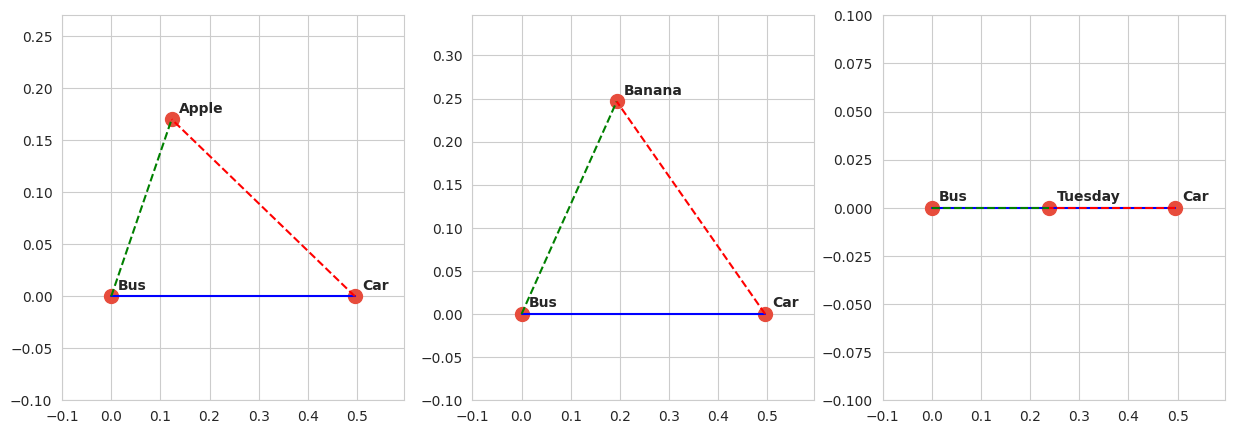

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Organize the data into a structured Format
data = {
    "Experiment": ["Exp 1 (Apple)", "Exp 1 (Apple)", "Exp 1 (Apple)",
                   "Exp 2 (Banana)", "Exp 2 (Banana)", "Exp 2 (Banana)",
                   "Exp 3 (Tuesday)", "Exp 3 (Tuesday)", "Exp 3 (Tuesday)"],
    "Pair": ["Bus-Car", "Bus-Apple", "Car-Apple",
             "Bus-Car", "Bus-Banana", "Car-Banana",
             "Bus-Car", "Bus-Tuesday", "Car-Tuesday"],
    "Similarity": [sim_bus_car_e1, sim_bus_apple, sim_car_apple,
                   sim_bus_car_e2, sim_bus_banana, sim_car_banana,
                   sim_bus_car_e3, sim_bus_tuesday, sim_car_tuesday]
}

df = pd.DataFrame(data)

# --- OPTION 3: SEMANTIC MAP (GEOMETRIC TRIANGLES) ---
# This calculates 2D coordinates based on similarity (distance)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
experiments = [
    ("Exp 1", "Apple", 0.4957, 0.2100, 0.4098), # Bus-Car, Bus-X, Car-X
    ("Exp 2", "Banana", 0.4957, 0.3135, 0.3899),
    ("Exp 3", "Tuesday", 0.4957, 0.2040, 0.2238)
]

for i, (name, target, bc, bt, ct) in enumerate(experiments):
    # Using the Law of Cosines to find coordinates (x, y)
    # so that distances between points match the similarity scores
    x_val = (bt**2 + bc**2 - ct**2) / (2 * bc)
    y_val = np.sqrt(max(0, bt**2 - x_val**2))

    # Plot points
    axes[i].scatter([0, bc, x_val], [0, 0, y_val], color='#e74c3c', s=100)
    labels = ["Bus", "Car", target]
    for j, txt in enumerate(labels):
        axes[i].annotate(txt, ([0, bc, x_val][j], [0, 0, y_val][j]), xytext=(5,5), textcoords='offset points', fontweight='bold')

    # Draw lines between data points
    axes[i].plot([0, bc], [0, 0], 'b-')
    axes[i].plot([0, x_val], [0, y_val], 'g--')
    axes[i].plot([bc, x_val], [0, y_val], 'r--')

    # Add some padding to the x and y axes
    max_x = max([0, bc, x_val])
    max_y = max([0, y_val])
    axes[i].set_xlim(-0.1, max_x + 0.1)
    axes[i].set_ylim(-0.1, max_y + 0.1)